In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#### 1. Numpy를 활용한 데이터셋 생성

In [2]:
# 도미 + 빙어 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# test
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5]) # 처음부터(0) ~ 4번까지

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
# test
# 서로 다른 크기의 이미지 사이즈를 맞출 때 자주 사용
print(np.ones(5))
print(np.zeros(5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [8]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### 2. Scikit-learn으로 Train/Test 데이터 나누기

In [9]:
# Default: 75% : 25%
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [10]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [11]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [12]:
# 도미 35마리, 빙어 14마리   2.5 : 1 비율
# 생선 13마리: 도미 10마리, 빙어 3마리
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [21]:
# stratify = fish_target: class 비율에 맞게 데이터셋 분할
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify = fish_target, random_state=42)

#### 3. 수상한 도미 한 마리

In [14]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [15]:
# 도미: 1, 빙어: 0
print(kn.predict([[25, 150]])) # 빙어로 분류

[0.]


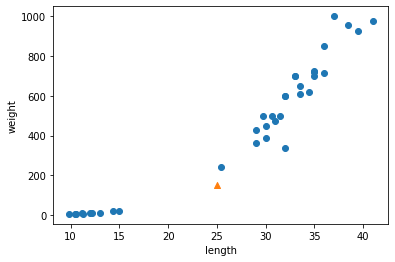

In [16]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
distance, indexes = kn.kneighbors([[25, 150]])

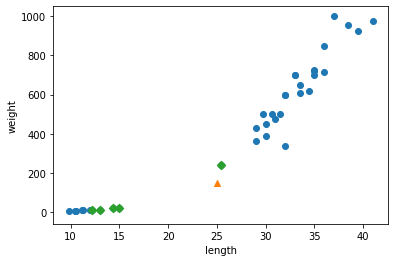

In [18]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [20]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


#### 4. 정규화

#### 표준점수 또는 z score 사용한 정규화
- 분산: 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균 냄
- 표준편차: 분산의 제곱근, 데이터가 분산된 정도
- 표준점수: 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타냄

> 표준점수 공식: (특징 - mean) / std

In [23]:
mean = np.mean(train_input, axis=0) # axis: 0(x축), 1(y축), 2(z축)
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [26]:
# 브로드 캐스팅
train_scaled = (train_input - mean) / std

In [28]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

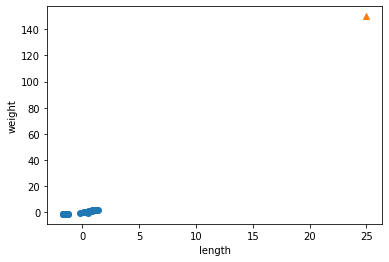

In [30]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [32]:
new = ([25, 150] - mean) / std

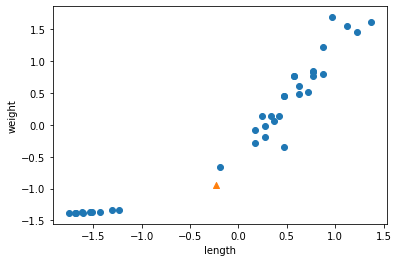

In [33]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [34]:
# 정규화 된 데이터로 학습
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [35]:
# Test도 정규화
test_scaled = (test_input - mean) / std

In [36]:
kn.score(test_scaled, test_target)

1.0

In [37]:
# 수상한 도미도 정상적으로 도미로 분류
print(kn.predict([new]))

[1.]


1. 특징(x) / 정답(y) - ALL
 - 특징(길이, 무게) / 정답(0 or 1)
2. Train / Test 데이터 분류
 - 7:3, 8:2
 - 클래스별로 분리
3. 정규화(특징 데이터)
 - 표준점수(z-score) (많이 사용!)
 - 0 ~ 1
 - min-max 정규화 함수 (비추)

### 시험!!
1. 데이터셋 구성
x(특징데이터), y(정답데이터)

2. 정규화(z-score)

3. Train/Test 셋 분리
=> Train/Valid/Test
=> Cross Validation 셋 분리